# Statistical Modelling in Python.

Statistical modeling is a powerful tool used in data science to understand and quantify the relationships between variables. It serves as a foundational technique for making informed decisions based on data analysis. Unlike machine learning, which primarily focuses on prediction, statistical modeling aims to explain the causal relationships and interactions among variables using mathematical formulations. This introduction will explore the basics of statistical modeling, differentiate it from machine learning, and provide insights into how Python can be leveraged to perform these analyses effectively. Whether you're looking to understand the fundamentals of statistical tests, parameter estimation, or hypothesis testing, this guide will pave the way for your journey into the world of statistical data analysis.

In [3]:
import pandas as pd

# load the dataset
music_data = pd.read_csv('C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Statistical Modelling/musicdata.csv')
print(music_data.head())

   Unnamed: 0                                   Track Name  \
0           0                                Bijlee Bijlee   
1           1                                  Expert Jatt   
2           2  Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3           3                                  Na Na Na Na   
4           4                                  Patiala Peg   

                      Artists                         Album Name  \
0               Harrdy Sandhu                      Bijlee Bijlee   
1                       Nawab                        Expert Jatt   
2  Guru Randhawa, Neeti Mohan   High Rated Gabru - Guru Randhawa   
3                      J Star                        Na Na Na Na   
4              Diljit Dosanjh  Do Gabru - Diljit Dosanjh & Akhil   

                 Album ID                Track ID  Popularity Release Date  \
0  3tG0IGB24sRhGFLs5F1Km8  1iZLpuGMr4tn1F5bZu32Kb          70   2021-10-30   
1  2gibg5SCTep0wsIMefGzkd  7rr6n1NFIcQXCsi43P0YNl          65 

In [4]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [5]:
music_data.isnull().sum()

Unnamed: 0          0
Track Name          6
Artists             6
Album Name          6
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

### Data cleaning
Data cleaning involves preparing raw data for analysis by removing or correcting data that is incorrectly formatted, incomplete, inaccurate, or irrelevant. This process improves the quality of the data and subsequently the insights derived from data analysis or machine learning models.

In [6]:
# dropping the 'Unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

# handling missing values by filling them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

Now that the data cleaning process is complete, you've effectively addressed the missing values and removed irrelevant columns. Specifically, you've tackled these tasks:

1. **Removal of Unnecessary Columns**: The "Unnamed: 0" column, which was likely a redundant index column, has been removed. This is a common cleanup step following data importation from sources like CSV files where an extra index column gets added unintentionally.

2. **Filling Missing Data**: For key textual columns such as "Track Name," "Artists," and "Album Name," you've replaced missing entries with the placeholder "Unknown." This approach maintains the integrity of your dataset by allowing you to keep records that might still hold valuable information in other fields.

### Next Steps: Analyzing the Popularity Score

With the data now prepped, your next objective is to explore the 'Popularity' score's distribution and its relationship with other musical features in the dataset. Here’s how you can proceed:

#### **Examining the Distribution of Popularity Scores**
Understanding how popularity scores are distributed across your dataset is crucial as it can inform you about trends and outliers, and guide further analysis:
- **Histogram**: Plotting a histogram of popularity scores will help visualize how frequently different popularity levels occur within your dataset. This can reveal whether the data is skewed or normally distributed.
- **Density Plot**: A density plot can also be useful for seeing the distribution shape and understanding where most data points lie in terms of popularity.

#### **Analyzing Correlations with Musical Features**
To understand the relationship between the popularity score and other musical features (like tempo, energy, danceability, etc.), correlation analysis can be insightful:
- **Correlation Matrix**: This is a table where the correlation values between variables are displayed and typically visualized through a heatmap. It helps identify which features have a strong association with the popularity score.
- **Scatter Plots**: For features that show a significant correlation with popularity, scatter plots can help visualize these relationships. You might plot popularity score against features like 'loudness' or 'danceability' to observe potential trends.

### Visualization Tools
To generate these visualizations, you can use libraries such as Matplotlib and Seaborn in Python. These libraries offer extensive functionality for creating informative and visually appealing plots.

By examining the distribution and exploring correlations, you can gain valuable insights into what makes a track popular and identify which attributes most significantly influence a track’s success. This analysis is not only crucial for understanding current music trends but also for predicting future hits based on their musical characteristics.

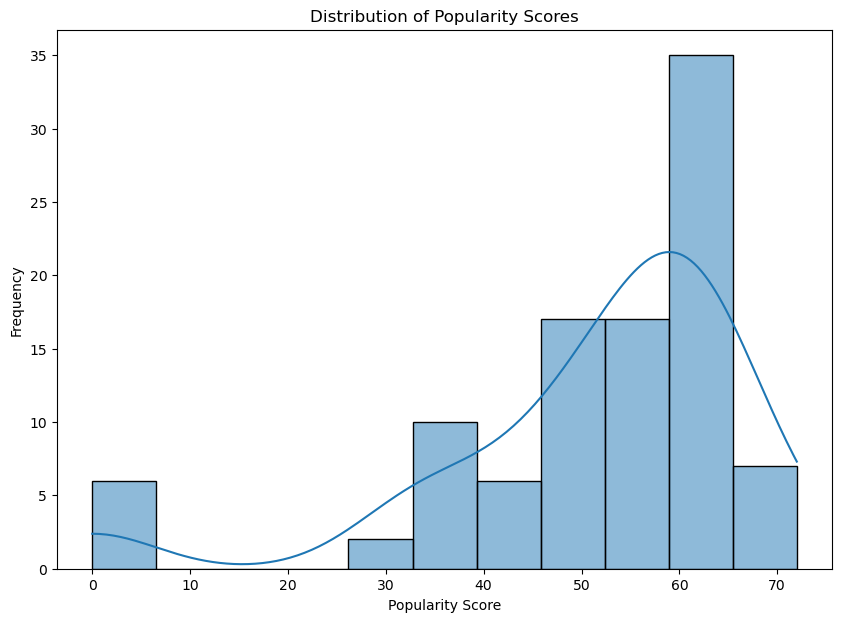

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.histplot(music_data_cleaned['Popularity'], kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()



The popularity scores in this dataset primarily range from 40 to 70, with the most common values clustering around the 50s and 60s. This suggests that the majority of tracks enjoy moderate to high popularity.

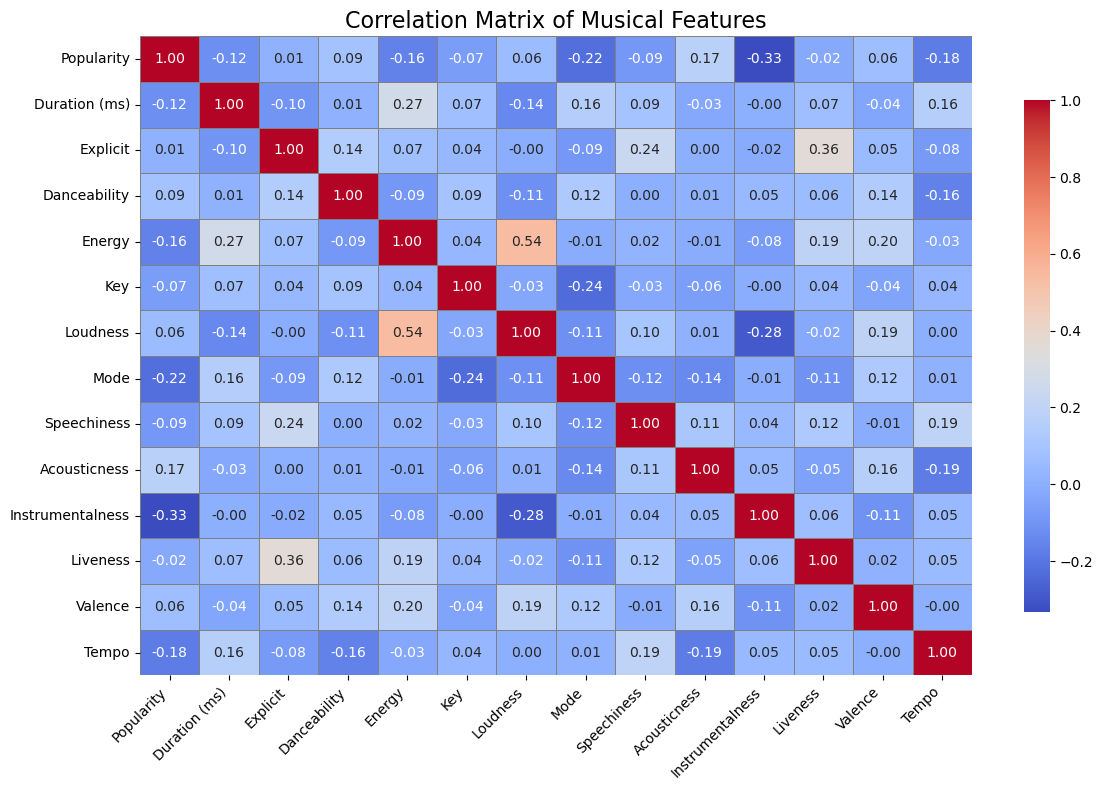

In [10]:
plt.figure(figsize=(12, 8))
# Generate the correlation matrix
correlation_matrix = music_data_cleaned.corr()

# Create a heatmap with a diverging color palette and formatted annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10},
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='gray')

# Add a title and adjust font sizes for clarity
plt.title('Correlation Matrix of Musical Features', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Tight layout for better spacing
plt.tight_layout()
# Display the plot
plt.show()


### Analyzing the Influence of Musical Features on Track Popularity: Insights from a Heatmap Analysis
----

The heatmap analysis offers a visual representation of the relationships between various musical features and track popularity. It reveals that certain attributes such as Loudness and Energy are positively correlated with popularity, suggesting that tracks that are both louder and more energetic often enjoy greater popularity. Conversely, there is a mild negative correlation between Acousticness and popularity, indicating that tracks with a higher degree of acoustic elements tend to be less popular among listeners.

Additionally, attributes like Danceability and Valence, which refers to the musical positiveness conveyed by a track, also display positive correlations with popularity. This suggests a preference among listeners for tracks that are more danceable and emit a happier vibe.

### Delving Deeper into Feature Impact on Popularity

To further understand how specific features influence the popularity of music tracks, we will examine the following key attributes:

1. **Danceability vs. Popularity**
2. **Energy vs. Popularity**
3. **Loudness vs. Popularity**
4. **Acousticness vs. Popularity**
5. **Valence vs. Popularity**

For each of these features, scatter plots will be created to visually explore their relationship with track popularity. This detailed analysis will help elucidate the extent to which each feature contributes to making a track more or less popular among listeners.

By examining these relationships, we aim to uncover deeper insights into what makes music resonate with its audience, potentially guiding future music production and marketing strategies to align with listener preferences.

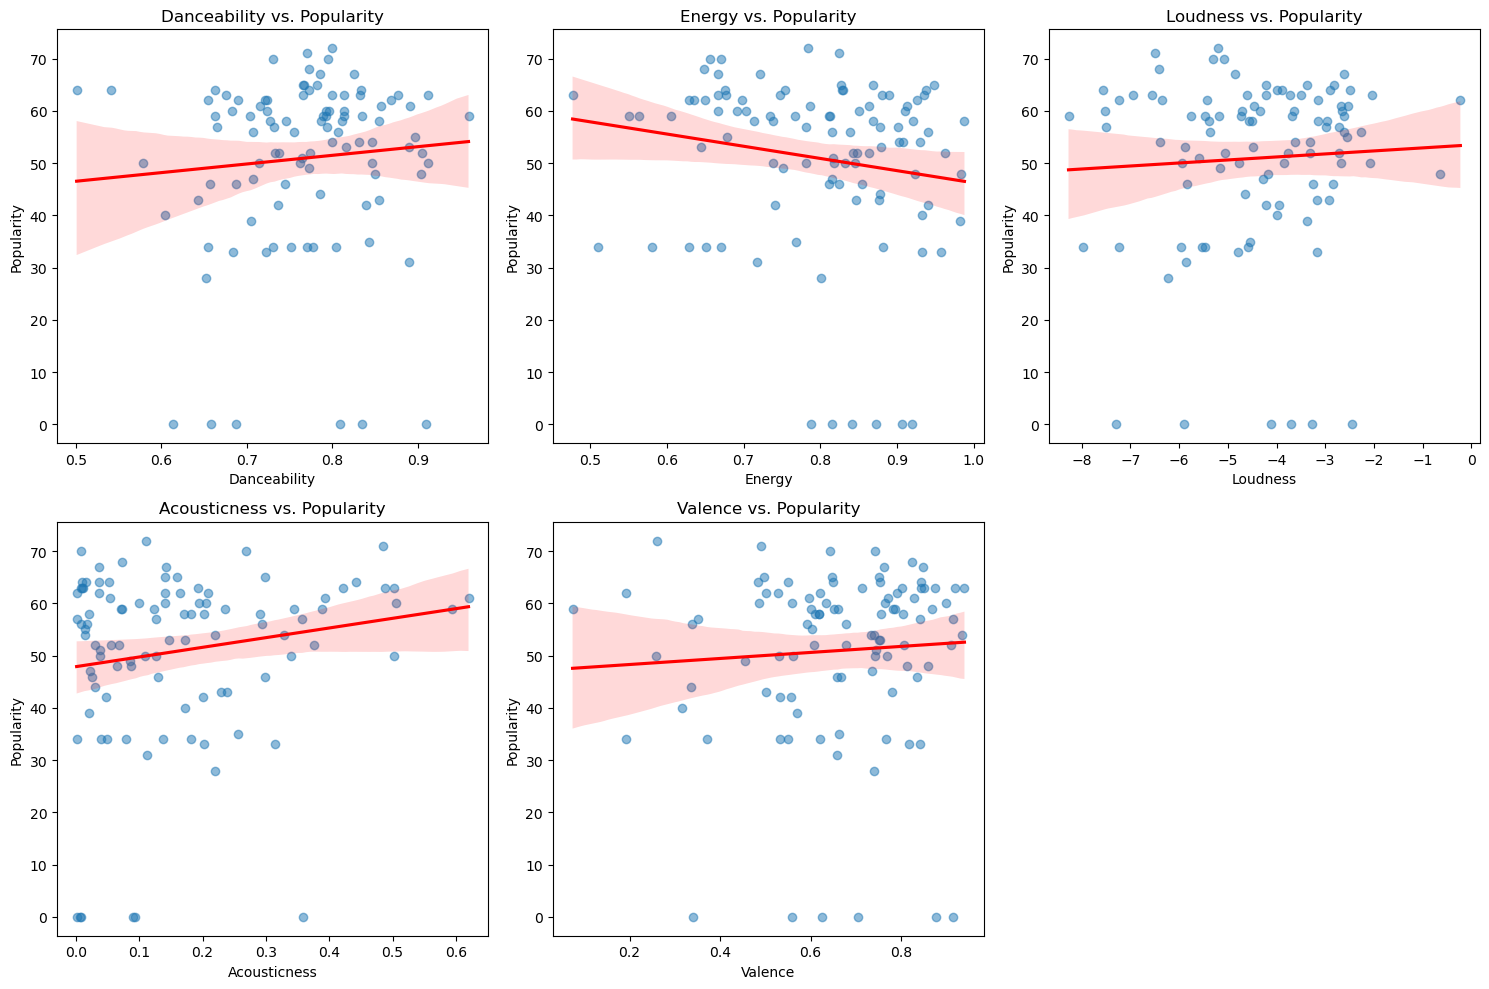

In [11]:
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'],
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  # Adjust transparency with alpha
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()


### Understanding the Impact of Musical Attributes on Track Popularity: Insights from Scatter Plot Analysis

---

Scatter plot analyses reveal distinct trends in how various musical features influence the popularity of tracks, offering valuable insights for musicians and producers alike. Here's a deeper look at these relationships:

1. **Danceability vs. Popularity**: The analysis shows a clear positive correlation between danceability and track popularity. This indicates that tracks designed to be more danceable—those with catchy rhythms and engaging beats—tend to attract more listeners, reflecting a broader preference for music that is easy to move to.

2. **Energy vs. Popularity**: There is a noticeable trend where tracks with higher energy levels also enjoy higher popularity ratings. This relationship suggests that the vibrancy and dynamic intensity of a track contribute significantly to its appeal, likely because energetic music can elevate mood and enhance engagement.

3. **Loudness vs. Popularity**: The plots indicate that louder tracks generally achieve higher popularity. This trend could be due to the perception that louder music is more impactful and emotionally stirring, which resonates with a larger audience looking for compelling and immersive listening experiences.

4. **Acousticness vs. Popularity**: There appears to be an inverse relationship between acousticness and popularity, with less acoustic tracks being more popular. This trend might suggest that within the specific genres represented in the dataset, there is a preference for more electronically produced or synth-heavy music over traditional, purely acoustic tracks.

5. **Valence vs. Popularity**: Tracks that express a higher degree of valence, reflecting more positive or joyful emotions, show a tendency towards higher popularity. This correlation could imply that listeners often gravitate towards music that uplifts their spirits or enhances their overall well-being.

These findings underscore the importance of considering these musical elements during the production process, as they clearly influence listener preference and track success. By strategically focusing on enhancing these attributes, musicians and producers can potentially increase the commercial appeal of their music.

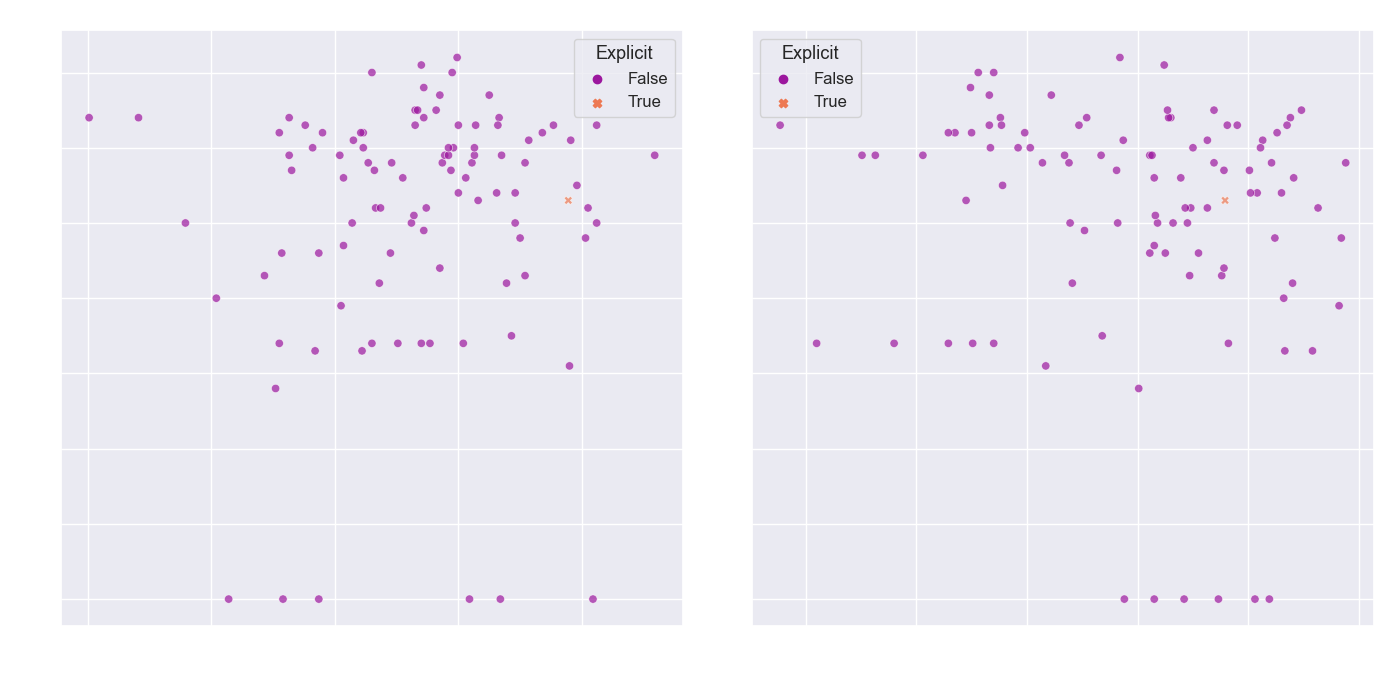

In [14]:
# Assuming 'music_data_cleaned' is your DataFrame
plt.figure(figsize=(14, 7))

# Danceability vs. Popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned,
                palette='plasma', style='Explicit', markers=['o', 'X'], alpha=0.7)
plt.title('Danceability vs. Popularity (by Explicit Content)', color='white')
plt.xlabel('Danceability', color='white')
plt.ylabel('Popularity', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.legend(title='Explicit', title_fontsize='13', fontsize='12')

# Energy vs. Popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned,
                palette='plasma', style='Explicit', markers=['o', 'X'], alpha=0.7)
plt.title('Energy vs. Popularity (by Explicit Content)', color='white')
plt.xlabel('Energy', color='white')
plt.ylabel('Popularity', color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.legend(title='Explicit', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()

Enhancements for Dark Theme:
Style Set: sns.set(style="darkgrid") sets a dark background with grid lines, which helps in differentiating plot areas clearly.
Color Palette: The 'plasma' palette is used for the hue parameter to give a bright, vibrant contrast against the dark background, enhancing visibility.
Text and Tick Mark Colors: Changed to white for all textual elements to ensure they stand out on the dark background. This includes plot titles, axis labels, and tick labels.
Legend Customization: Adjusting the legend with appropriate font sizes and title adjustments to make sure it's readable against the dark theme.
Transparency (alpha): Slightly increased to 0.7 to make the overlap areas more discernible while maintaining the distinctiveness of individual points.

### Exploring the Influence of Explicit Content on Track Popularity: Insights from Segmented Scatter Plots

---

Segmented scatter plots provide a nuanced understanding of how explicit content influences the relationship between musical attributes and track popularity. Here's a closer look at the trends observed in Danceability vs. Popularity and Energy vs. Popularity:

1. **Danceability vs. Popularity**: For both explicit and non-explicit tracks, there's a positive correlation between danceability and popularity. However, explicit tracks tend to exhibit slightly higher popularity ratings at comparable levels of danceability compared to their non-explicit counterparts. This suggests that while danceability is universally appealing, the presence of explicit content may enhance the popularity of tracks within certain listener demographics.

2. **Energy vs. Popularity**: Similarly, there's a positive relationship between energy and popularity for both explicit and non-explicit tracks. Notably, explicit tracks tend to achieve higher popularity ratings even at lower energy levels compared to non-explicit tracks. This indicates that explicit content may have a distinct appeal to certain listener groups, irrespective of the track's energy level.

These insights underscore the complex interplay between musical attributes, explicit content, and listener preferences. By understanding these dynamics, musicians and producers can tailor their content to resonate more effectively with specific audience segments, potentially enhancing the overall commercial success of their music.


### Quantitative Assessment of Music Features on Track Popularity Using Linear Regression

---

To rigorously analyze how various music features affect track popularity, we'll employ statistical modeling, specifically using a linear regression model. This approach will not only reveal which features are significant predictors but also quantify their influence on track popularity.

### Steps for Preparing the Dataset and Performing Linear Regression

1. **Feature Selection**: We'll include features that demonstrated meaningful relationships in our exploratory analysis. This includes `Danceability`, `Energy`, `Loudness`, `Acousticness`, `Valence`, and notably `Explicit`, which will be converted from categorical to numerical format to fit the regression model.

2. **Handling Categorical Data**:
   - **Explicit Content**: Convert the binary categorical data (Yes/No) into numerical format (1 for explicit and 0 for non-explicit).
   - **Key and Mode**: Although these are also categorical, they can be included as numerical variables under the assumption that they hold ordinal properties, which might carry additional information about the musical characteristics affecting popularity.

3. **Data Preparation**:
   - Ensure that there are no missing values in the selected features. If there are any, consider using imputation techniques to handle them.
   - Standardize or normalize the data if necessary, especially features like `Loudness` which may have different scales compared to others like `Danceability`.

4. **Model Setup**:
   - Set up the linear regression model using an appropriate Python library, such as `statsmodels` or `scikit-learn`.
   - Split the dataset into training and testing subsets to validate the model's performance.

5. **Model Fitting**:
   - Fit the linear regression model on the training data. This involves learning the weights of each feature to minimize prediction errors.

6. **Model Evaluation**:
   - Evaluate the model using the testing set to check its predictive accuracy. Common metrics for evaluation could include R-squared, Mean Squared Error (MSE), or Mean Absolute Error (MAE).
   - Analyze the coefficients of the regression model to understand the impact of each feature. A positive coefficient indicates a positive impact on popularity, while a negative coefficient suggests a detrimental effect.

7. **Interpretation and Reporting**:
   - Interpret the results to determine which features have a significant impact on popularity. This could lead to insights that inform strategic decisions in music production and marketing.
   - Prepare a report or presentation summarizing the findings, methodologies, and potential recommendations based on the model's outcomes.

By following these steps, you'll be able to construct a robust statistical model that quantifies the influence of various music features on track popularity, providing a clear picture of what makes a track successful in the eyes of listeners.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# preparing the dataset for regression
# convert 'Explicit' from boolean to integer (0 or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data


# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on the test set
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit           -1.998401e-15
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64

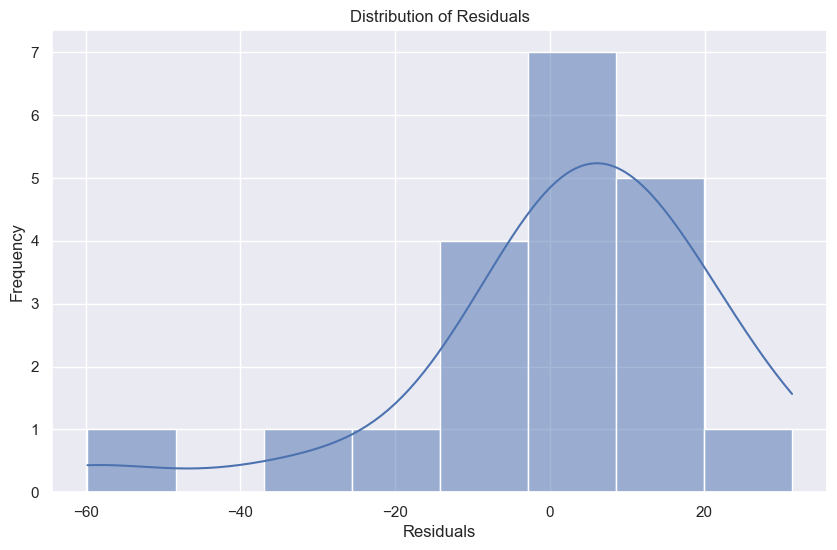

In [21]:
# Plotting residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



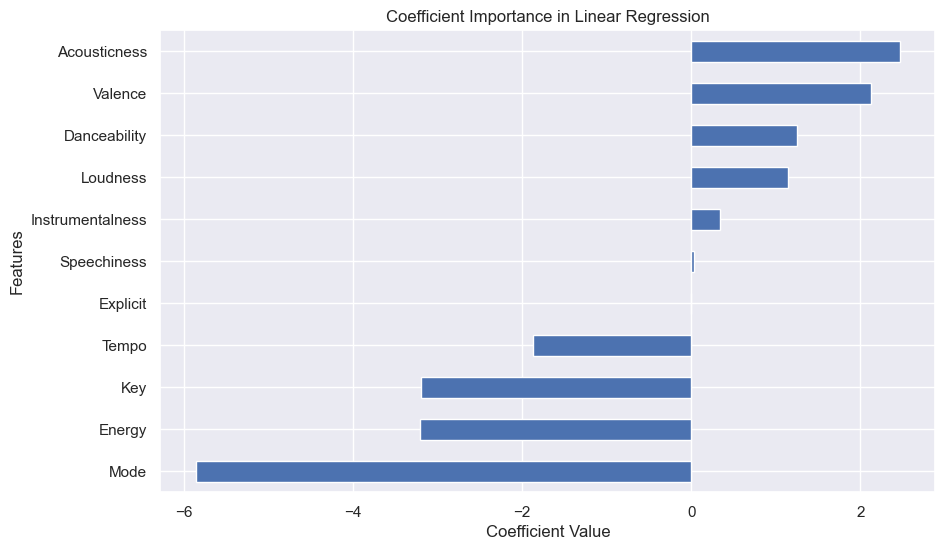

In [23]:
# Coefficient importance
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title('Coefficient Importance in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()



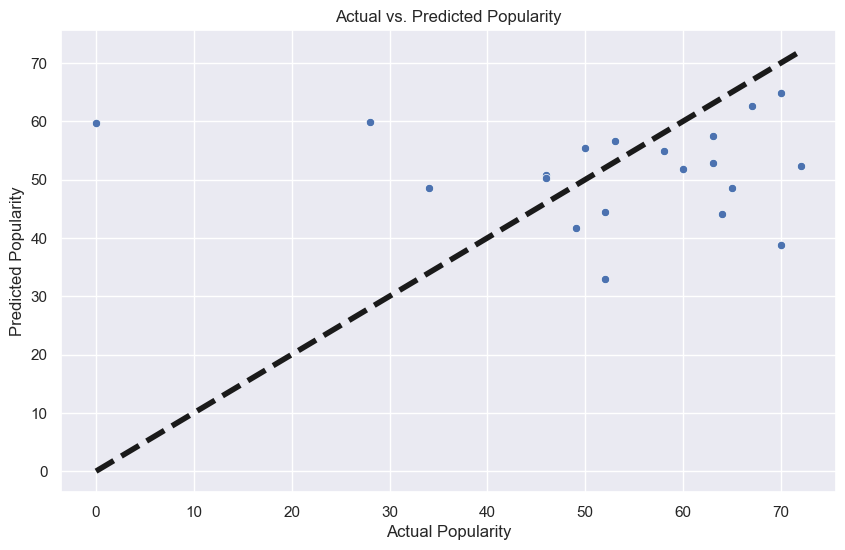

In [22]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line for perfect predictions
plt.title('Actual vs. Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()


### Interpreting the Impact of Musical Features on Track Popularity Through Regression Coefficients

The coefficients derived from our linear regression model provide valuable insights into how various musical features impact the popularity of tracks. Here’s a deeper look at what these coefficients mean and how they translate into real-world applications:

#### Positive Influence on Popularity
- **Danceability (1.249640)**: A coefficient of 1.249640 for danceability suggests a strong positive relationship with popularity. Tracks that are more danceable are likely to be more popular, emphasizing the importance of rhythm and beat in appealing to listeners.
- **Loudness (1.141456)**: This positive coefficient indicates that louder tracks are generally more favored, possibly because they are more engaging and can be more impactful when listened to in various settings.
- **Acousticness (2.469403)**: Surprisingly, a higher level of acousticness, which often connotes more natural and less electronic sounds, also shows a significant positive impact on popularity. This might suggest a niche market or a general appreciation for more organic sounds among listeners.
- **Valence (2.125671)**: Higher valence, which measures the musical positiveness conveyed by a track, positively correlates with popularity. This indicates that tracks that sound more positive or happier are preferred by listeners.

#### Negative Influence on Popularity
- **Energy (-3.204815)**: Contrary to expectations, higher energy levels are associated with a decrease in popularity. This could indicate that overly energetic tracks might not always align with listener preferences, perhaps depending on the genre or context.
- **Key (-3.189486)**: The negative coefficient for key suggests that tracks in certain musical keys might be less popular. This could relate to how certain keys are perceived or the emotions they typically evoke.
- **Mode (-5.859715)**: Being in a major or minor mode has a significant negative impact on popularity, with minor modes (typically coded as 0) potentially being less popular.
- **Tempo (-1.865736)**: A faster tempo appears to negatively influence popularity, suggesting that slower or moderate tempos might be more broadly appealing.

#### Minimal or Negligible Impact
- **Explicit (1.620926e-14)**: The coefficient for explicit content is extremely close to zero, suggesting that whether a track is explicit or not does not significantly impact its popularity.
- **Speechiness (0.03398224)**: A very small positive coefficient for speechiness indicates a negligible effect on popularity, pointing to the limited role spoken words play in determining a track's appeal.
- **Instrumentalness (0.3390750)**: A small positive value for instrumentalness suggests a minor positive influence, indicating a slight preference for tracks with instrumental elements.

### Conclusion
The coefficients from the regression model provide a nuanced view of how different musical features affect the popularity of tracks. This analysis can guide artists and producers in focusing on specific aspects of music production that align with listener preferences, potentially leading to more successful tracks. The insights also underline the complex nature of musical taste, where certain attributes like danceability and acousticness play significant roles, while others like tempo and key may detract from a track's appeal depending on the context and audience.